# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [9]:
def pdfx (lambdax,x):
	return lambdax * np.exp(-1*lambdax*x)

likelihood1 = 1
likelihood2 = 1
for x in data[1].values:
  likelihood1 = likelihood1 * pdfx(1,x)
  likelihood2 = likelihood2 * pdfx(2,x)
log_likelihood1 = np.log(likelihood1)
log_likelihood2 = np.log(likelihood2)
print(log_likelihood1 - log_likelihood2)

-20.366416970604874


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [11]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

Find the parameters required to compute the T statistic

In [12]:
significance = 0.05
mu1 = np.mean(sample1[1].values)
mu2 = np.mean(sample2[1].values)
s1 = np.var(sample1[1].values)
s2 = np.var(sample2[1].values)
n1 = sample1[1].shape[0]
n2 = sample1[1].shape[0]

Find the degrees of freedom to get the critical value

In [14]:
T = (mu1 - mu2) / np.sqrt((s1/n1) + (s2 / n2))
df = np.square((s1/n1) + (s2 / n2)) / (((s1/n1)**2)/(n1-1) + ((s2/n2)**2)/(n2-1))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [15]:
critical_value = stats.t.pdf((1-significance)/2,df)
print('T : {}, Critical Value : {}'.format(np.abs(T),critical_value))
if np.abs(T) > critical_value:
    print('YES')
else:
    print('NO')

T : 18.292145241166835, Critical Value : 0.35547474461325235
YES


Plot the distribution of both the samples to visualize

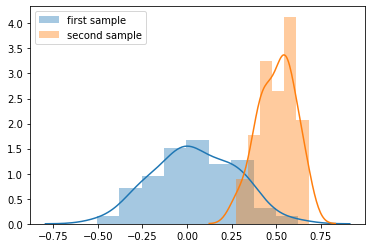

In [16]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()